In [1]:
#Importing all necessary packages
import pandas as pd
import numpy as np
import matplotlib as mp
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
import scipy.stats as stats

In [2]:
#Reading the data
claims = pd.read_csv('claims.csv')
cust_demographics = pd.read_csv('cust_demographics.csv')

In [3]:
#1)Final merged dataset
final_claims_join = pd.merge(cust_demographics,claims,how='left',left_on = 'CUST_ID',right_on = 'customer_id')

In [4]:
#2)Data types and check for mismatch and performing data cleaning as per business understanding
final_claims_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092 entries, 0 to 1091
Data columns (total 16 columns):
CUST_ID                1092 non-null int64
gender                 1092 non-null object
DateOfBirth            1092 non-null object
State                  1092 non-null object
Contact                1092 non-null object
Segment                1092 non-null object
claim_id               1085 non-null float64
customer_id            1085 non-null float64
incident_cause         1085 non-null object
claim_date             1085 non-null object
claim_area             1085 non-null object
police_report          1085 non-null object
claim_type             1085 non-null object
claim_amount           1020 non-null object
total_policy_claims    1075 non-null float64
fraudulent             1085 non-null object
dtypes: float64(3), int64(1), object(12)
memory usage: 145.0+ KB


In [5]:
#2)Data cleaning
final_claims_join['claim_id'] = final_claims_join['claim_id'].fillna(0)
final_claims_join['customer_id'] = final_claims_join['customer_id'].fillna(0)

In [6]:
#2)Data converions as per business requirement
final_claims_join['DateOfBirth'] = final_claims_join['DateOfBirth'].astype('datetime64[ns]')
final_claims_join["DateOfBirth"] = final_claims_join["DateOfBirth"].apply(lambda x  : x.replace (x.year-100) if x.year >=2000 else x)
final_claims_join['claim_date'] = final_claims_join['claim_date'].astype('datetime64[ns]')
final_claims_join['claim_id'] = final_claims_join['claim_id'].astype('int64')
final_claims_join['customer_id'] = final_claims_join['customer_id'].astype('int64')

In [7]:
#3)Converting claim_amount column to proper format
final_claims_join['claim_amount'] = final_claims_join['claim_amount'].str.replace('$','')
final_claims_join['claim_amount'] = final_claims_join['claim_amount'].astype('float')
final_claims_join['claim_amount'] = final_claims_join['claim_amount'].fillna(final_claims_join['claim_amount'].mean())
final_claims_join['claim_amount'] = final_claims_join['claim_amount'].astype('int64')

In [8]:
#4)create an alert flag fo reported and unreported claims (1 - 'Yes' & 0 - 'No')
p = final_claims_join.police_report
final_claims_join['police_report'] = np.where((p == 'Yes'),1,final_claims_join['police_report'])
final_claims_join['police_report'] = np.where((p == 'No'),0,final_claims_join['police_report'])

In [9]:
final_claims_join.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,0,Material only,2980,1.0,No
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980,3.0,No
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,30308357,Other driver error,2018-02-02,Auto,0,Material only,3369,1.0,Yes
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,30308357,Driver error,2018-04-04,Auto,0,Material only,1950,6.0,No
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,47830476,Natural causes,2018-06-17,Auto,0,Material only,1680,1.0,No


In [10]:
#5)One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. 
#However, customer IDshould remain unique. Retain the most recent observation and delete any duplicated records in
#the data based on the customer ID column.
q5 = final_claims_join.sort_values(by = ['customer_id','claim_date'])
q5_1 = q5.drop_duplicates(subset = ['customer_id'],keep = 'last')
q5_1.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
639,70659761,Male,1994-06-25,WI,928-163-5178,Platinum,0,0,NaN,NaT,NaN,NaN,NaN,12467,NaN,NaN
188,154557,Female,1978-05-23,DE,962-879-1238,Platinum,69348631,154557,Driver error,2018-04-10,Auto,0,Injury only,12467,1.0,Yes


In [11]:
#6)Identifying missing values in the data
final_claims_join.isnull().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
customer_id             0
incident_cause          7
claim_date              7
claim_area              7
police_report           7
claim_type              7
claim_amount            0
total_policy_claims    17
fraudulent              7
dtype: int64

In [12]:
#Imputing missing values with mode and mean
final_claims_join['claim_type'] = final_claims_join['claim_type'].fillna('Material only')
final_claims_join['police_report'] = final_claims_join['police_report'].fillna(0)
final_claims_join['claim_area'] = final_claims_join['claim_area'].fillna('Auto')
final_claims_join['claim_date'] = final_claims_join['claim_date'].fillna('2018-04-04')
final_claims_join['claim_date'] = final_claims_join['claim_date'].astype('datetime64[ns]')
final_claims_join['incident_cause'] = final_claims_join['incident_cause'].fillna('Other causes')
final_claims_join['total_policy_claims'] = final_claims_join['total_policy_claims'].fillna(1)
final_claims_join['fraudulent'] = final_claims_join['fraudulent'].fillna('No')

In [13]:
#7)Age calculation based on DOB
now = pd.Timestamp('now')
final_claims_join['Age'] = (now - final_claims_join['DateOfBirth']).astype('<m8[Y]')

In [14]:
#7)Deriving age categories
p = final_claims_join.Age
final_claims_join['Age_Group'] = np.where((p < 18),'Children',
                                          np.where((p >= 18) & (p < 30),'Youth',
                                                   np.where((p >= 30) & (p <= 60),'Adult','Senior')))

In [15]:
#8)Average amount claimed by customers from various segments
q8 = final_claims_join.groupby(by = ['Segment'])[['claim_amount']].mean().round().add_prefix('Average_')
q8

,Average_claim_amount
Segment,
Gold,12829.0
Platinum,12343.0
Silver,12211.0


In [16]:
#9)What is the total claim amount based on incident cause for all the claims that have been done at least 20 days 
#prior to 1st of October, 2018.
date = 20
final_claims_join['calc_date'] = final_claims_join['claim_date'] - pd.to_timedelta(date,unit = 'd')
q9_amt = final_claims_join[(final_claims_join['calc_date'] < '2018-10-01')][['claim_amount']].sum().add_prefix('Sum_of ')
q9_amt

Sum_of claim_amount    13346802
dtype: int64

In [17]:
#q10)How many adults claimed insurance from 'TX', 'DE' and 'AK' state for driver related issue
ts = final_claims_join.State
ts1 = final_claims_join.incident_cause
ts2 = final_claims_join.Age_Group
q10 = final_claims_join.loc[(ts == "TX")|(ts == "DE")|(ts == "AK")&(ts1 == 'Driver error')&(ts2 == 'Adult'),
                             ['CUST_ID','State','incident_cause','Age_Group']]
q10_a = q10.loc[(ts1 == 'Driver error')|(ts1 == 'Other driver error')&(ts2 == 'Adult'),
                             ['CUST_ID','State','incident_cause','Age_Group']]
q10_b = q10_a.loc[(ts2 == 'Adult'),['CUST_ID','State','incident_cause','Age_Group']]
q10_b.head(2)

,CUST_ID,State,incident_cause,Age_Group
103,92752865,AK,Driver error,Adult
118,61810954,TX,Other driver error,Adult


In [18]:
q10_b.groupby(by = ['State','incident_cause'])[['Age_Group']].count().add_prefix('Insurance claims from Adult ')

Insurance claims from Adult Age_Group
State incident_cause                                           
AK    Driver error                                            6
DE    Driver error                                            7
      Other driver error                                      5
TX    Driver error                                            5
      Other driver error                                      4

In [19]:
#q11)
q11 = final_claims_join.groupby(by = ['gender','Segment'])[['claim_amount']].sum().add_prefix('Sum of ').reset_index()

In [20]:
q11_b = q11.pivot(index='Segment',columns='gender',values='Sum of claim_amount')
q11_b

gender,Female,Male
Segment,,
Gold,2122189,2701357
Platinum,2381939,2123218
Silver,1939297,2346607


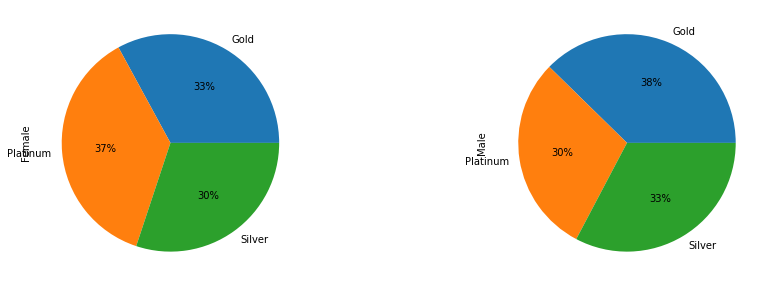

In [21]:
#q11 - Graphical representation
q11_b.plot(kind="pie",subplots=True,legend=False,figsize=(15,5),autopct="%.0f%%")
plt.show()

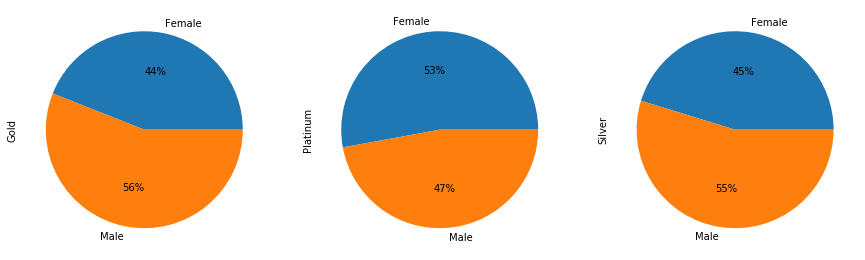

In [22]:
#q11 - Graphical representation
q11_b.T.plot(kind="pie",subplots=True,legend=False,figsize=(15,5),autopct="%.0f%%")
plt.show()

In [23]:
#q12)claims made by male and female for driver related incidents
ts1 = final_claims_join.incident_cause
q12 = final_claims_join.loc[(ts1 == 'Driver error')|(ts1 == 'Other driver error'),
                             ['gender','incident_cause','claim_amount']]
q12_a = q12.groupby(by = ['gender','incident_cause'])[['claim_amount']].sum().add_prefix('Sum of ').reset_index()
q12_b = q12_a.pivot(index="gender",columns="incident_cause",values="Sum of claim_amount")

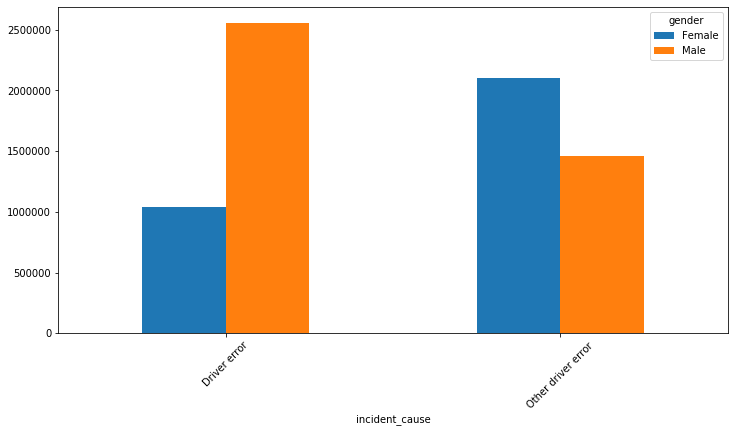

In [24]:
#q12 - Graphical representation
q12_b.T.plot(kind="bar",figsize = (12,6))
plt.xticks(rotation = 45)
plt.show()

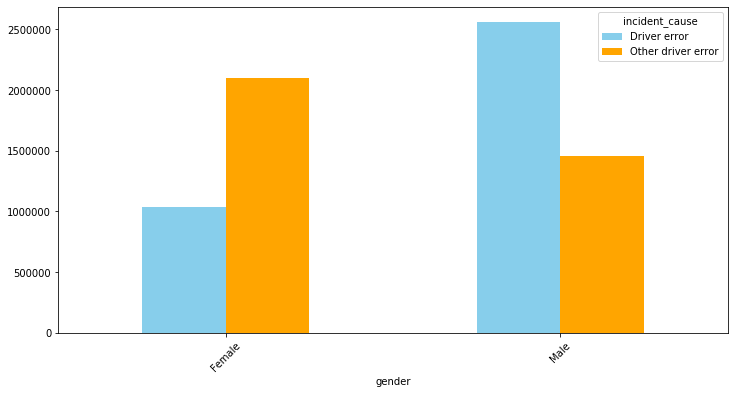

In [25]:
#q12 - Graphical representation
q12_b.plot(kind="bar",color = ['skyblue','orange'],figsize = (12,6))
plt.xticks(rotation = 45)
plt.show()

In [26]:
#13)which age group has the most fraudulent policy claims
ts1 = final_claims_join.fraudulent
q13 = final_claims_join.loc[(ts1 == 'Yes'),['fraudulent','Age_Group','claim_amount']]
q13_a = q13.groupby(by = 'Age_Group')[['claim_amount']].sum()
q13_a

,claim_amount
Age_Group,
Adult,2615176
Youth,602006


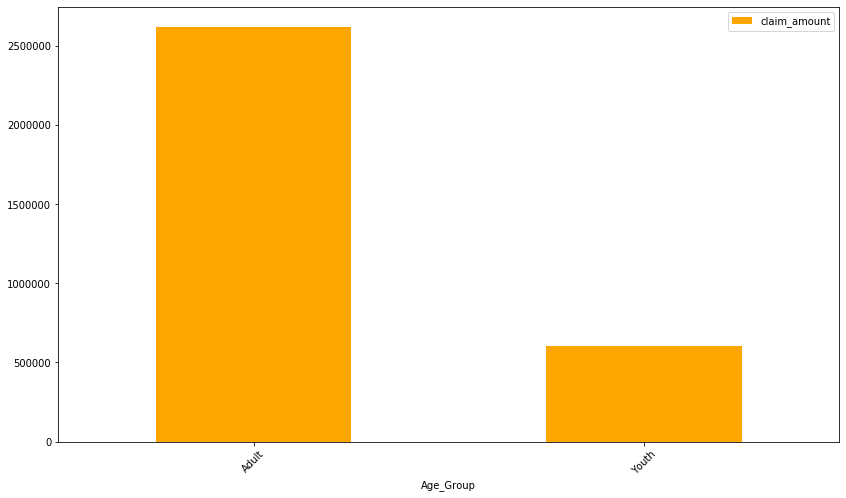

In [27]:
q13_a.plot(kind = 'bar',figsize = (14,8),color = 'orange')
plt.xticks(rotation = 45)
plt.xlabel = ('Sum of claim amount')
plt.ylabel = ('Age_Group')
plt.show()

In [28]:
#Identifying spend monthly and yearly wise 
final_claims_join['Month'] = final_claims_join['claim_date'].dt.month
final_claims_join['Year'] = final_claims_join['claim_date'].dt.year
ts1 = final_claims_join.Year
q14 = final_claims_join.loc[(ts1 == 2017),['Month','Year','claim_amount']]
q14_1 = q14.groupby(by = ['Month','Year'])[['claim_amount']].sum()
q14_a = final_claims_join.loc[(ts1 == 2018),['Month','Year','claim_amount']]
q14_2 = q14_a.groupby(by = ['Month','Year'])[['claim_amount']].sum()
q14_ans = q14_1.append(q14_2)

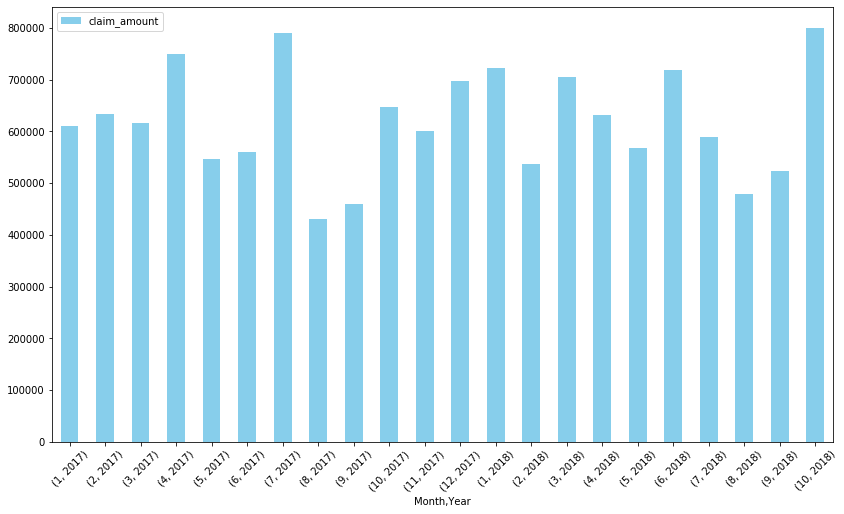

In [29]:
q14_ans.plot(kind = 'bar',figsize = (14,8),color = 'skyblue')
plt.xticks(rotation = 45)
plt.ylabel = ('Sum of claim amount')
plt.xlabel = ('Month & Year')
plt.show()

In [30]:
#q15)what is the average claim for gender and age categories
ts1 = final_claims_join.fraudulent
q15 = final_claims_join.loc[(ts1 == 'Yes'),['gender','Age_Group','fraudulent','claim_amount']]
q15_2 = final_claims_join.loc[(ts1 == 'No'),['gender','Age_Group','fraudulent','claim_amount']]
q15_a = q15.groupby(by = ['gender','Age_Group','fraudulent'])[['claim_amount']].mean().add_prefix('Average ').reset_index().round()
q15_2a = q15_2.groupby(by = ['gender','Age_Group','fraudulent'])[['claim_amount']].mean().add_prefix('Average ').reset_index().round()

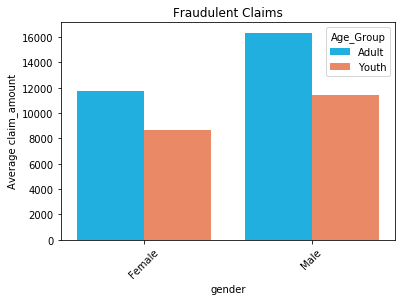

In [31]:
#Bar plot for frudulent claims
sns.barplot(x = "gender",
            y = "Average claim_amount",
            data = q15_a,
            hue = "Age_Group",
            palette=['deepskyblue','coral'])
plt.title('Fraudulent Claims')
plt.xticks(rotation = 45)
plt.show()

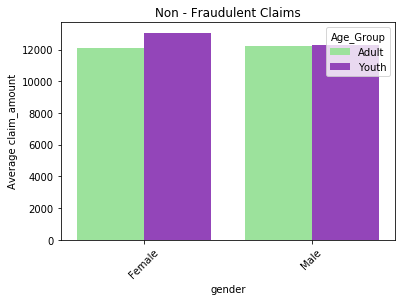

In [32]:
#Bar plot for Non - fraudulent claims
sns.barplot(x = "gender",
            y = "Average claim_amount",
            data = q15_2a,
            hue = "Age_Group",
            palette=['lightgreen','darkorchid'])
plt.title('Non - Fraudulent Claims')
plt.xticks(rotation = 45)
plt.show()

In [33]:
#q16)Is there any similarity in the amount claimed by males and females?
Male_claim  = final_claims_join.claim_amount.loc[(final_claims_join.gender == 'Male')]
Female_claim  = final_claims_join.claim_amount.loc[(final_claims_join.gender == 'Female')]

In [34]:
print ('the average claim by male customers is {}'.format(Male_claim.mean()))
print ('the average claim by female customers is {}'.format(Female_claim.mean()))

the average claim by male customers is 12851.58064516129
the average claim by female customers is 12066.338951310861


 ## H0 : Male claim == Female claim                                                                                                          
 ## Ha : Male claim != Female claim

### Two sample T test (Independent)

In [35]:
#Testing unequal variance case
uneq_var = stats.ttest_ind(a = Male_claim,b  = Female_claim,equal_var = False)
uneq_var.statistic

0.9745089890596915

In [36]:
#Testing equal variance case
equal_var = stats.ttest_ind(a = Male_claim,b  = Female_claim,equal_var = True)
equal_var.statistic

0.9737403809430631

As the value of t is same we need to go with equal variance case

In [37]:
equal_var.pvalue

0.330401501412234

As the value of p is greater than o.o5,we accept null hypothesis which is male claim == female claim. To conclude,The amount claimed by males is equal to amount claimed by female.

In [38]:
#17)Is there any relationship between age category and segment?

### H0 : Observed == Expected : There is no influence of age on segment        
### Ha : Observed <> Expected : There is influence of age on segment

### Chi square test

In [39]:
q17 = pd.crosstab(final_claims_join.Age_Group, final_claims_join.Segment, margins = True)
q17

Segment,Gold,Platinum,Silver,All
Age_Group,,,,
Adult,289,263,262,814
Youth,87,102,89,278
All,376,365,351,1092


In [40]:
test_score = stats.chi2_contingency(observed = q17)
test_score

(2.257944443182509,
 0.8945133044580127,
 6,
 array([[ 280.27838828,  272.07875458,  261.64285714,  814.        ],
        [  95.72161172,   92.92124542,   89.35714286,  278.        ],
        [ 376.        ,  365.        ,  351.        , 1092.        ]]))

The value of p is evidence to accept null hypothesis which is observed == expected. To conclude the hypothesis , we can say that age_category has good effect on the segment.

In [41]:
#q18)The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

### Ho : Current year claim amount == 10,000 dollars                                                                                                                        
### Ha : Current year claim amount > 10,000 dollars

### One sample T test

In [42]:
ttest_1 = stats.ttest_1samp(a = final_claims_join.claim_amount,popmean = 10000)
t_score = round(ttest_1.statistic,2)
p_value = ttest_1.pvalue

In [43]:
p_value

1.2910641156507557e-09

Since the p value is low, we reject null hypothesis and accept alternate hypothesis and we conclude that current year claim amount is either greater than or different than 10000 which was last years claim amount. Which means there is an improvement in the claim amount

In [44]:
#q19)Is there any difference between age groups and insurance claims?

### H0 : children_claims == youth_claims == adult_claims  : No Difference between claims                                                
### Ha : children_claims == youth_claims == adult_claims : There is a  Difference betwen the claims

### Anova

In [62]:
s1 = final_claims_join[final_claims_join.Age_Group == 'Children']
s1_1 = s1.claim_amount
s2 = final_claims_join[final_claims_join.Age_Group == 'Youth']
s2_1 = s2.claim_amount
s3 = final_claims_join[final_claims_join.Age_Group == 'Adult']
s3_1 = s3.claim_amount
s4 = final_claims_join[final_claims_join.Age_Group == 'Senior']
s4_1 = s4.claim_amount

In [64]:
q19 = stats.f_oneway(s1_1,s2_1,s3_1,s4_1)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:2951: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / len(a)


In [66]:
q19.pvalue

nan

### Dont know why it is displaying Nan for p.value. i checked for missing values and disturbances in the data but the data is clean. But even after that it is diplaying Nan. Maybe its an issue with the library.

For example : 
The value of p supports the evidence of accepting Null hypothesis i.e. observed == expected. To conclude the hypothesis, there is no effect of agegroup on the total no of insurance claims and vice versa.

In [48]:
#q20)Is there any relationship between total number of policy claims and the claimed amount?

### Correlation

In [67]:
policy_claims = final_claims_join.total_policy_claims
total_claim_amount = final_claims_join.claim_amount

In [69]:
print(np.corrcoef(policy_claims,total_claim_amount))

[[ 1.         -0.01793812]
 [-0.01793812  1.        ]]


In [70]:
policy_claims.corr(other = total_claim_amount)

-0.017938120439347418

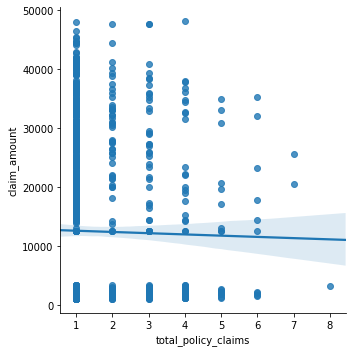

In [74]:
sns.lmplot(x = 'total_policy_claims',y = 'claim_amount',data = final_claims_join)

 There is no correlation between total policy claims and clim amout as the correlation coefficient value is equal to zero.